In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline

Wczytywanie danych

In [50]:
# ściezka do wczytywanego pliku z danymi
df = pd.read_csv('../../phishing-detect/draft/raw-data-1.csv')
df = df.drop(labels='id', axis=1)
df = df.drop(labels='jsScript', axis=1) # same 0 - brak przykładów

# zmienna do predykcji
predict = "Phishing"

<AxesSubplot:>

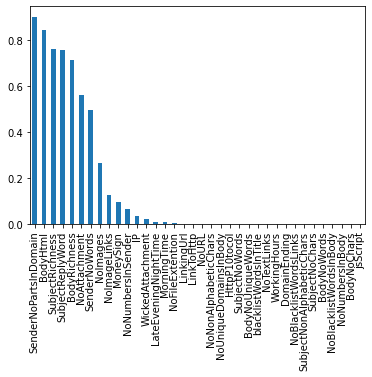

In [15]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

X = df.drop('Phishing',axis=1)
y = df['Phishing']
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [71]:
columns1 = df.columns
print(columns1)

Index(['id', 'blacklistWordsInTitle', 'SubjectReplyWord', 'SubjectNoChars',
       'SubjectNonAlphabeticChars', 'SubjectNoWords', 'standardHours',
       'SenderNoWords', 'SenderNoPartsInDomain', 'DomainEnding',
       'NoNumbersInSender', 'BodyNoChars', 'NoNonAlphabeticChars',
       'NoNumbersInBody', 'BodyNoWords', 'BodyNoUniqueWords',
       'NoBlacklistWordsInBody', 'MoneySign', 'NoURL', 'HttpProtocol',
       'NoTextLinks', 'NoBlacklistWordsLinks', 'LinkToHttp', 'NoImages',
       'NoImageLinks', 'NoAttachment', 'NoFileExtention', 'WickedAttachment',
       'phishing'],
      dtype='object')


In [48]:
df[predict].describe()

count    499.000000
mean       0.521042
std        0.500058
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Phishing, dtype: float64

In [61]:
col1_vec = df.columns.to_list
len(df.columns)

36

In [51]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(predict, axis=1), df[predict], test_size=0.2)
X_train.shape, X_test.shape

((399, 35), (100, 35))

In [52]:
sel=VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [63]:
n=10 # n liczba atrybutów, które chcemy zostawić
bestfeatures = SelectKBest(score_func=chi2, k=n) 
fit = bestfeatures.fit(X_train,y_train) # x zawiera wszystkie atrybuty a y zawiera decyzję oczekiwaną
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
#featureScores.nsmallest(n,'Score')
featureScores.sort_values(by=['Score'])

Feature        Score
19               BodyRichness     0.004021
10      SenderNoPartsInDomain     0.010427
5             SubjectRichness     0.013025
32               NoAttachment     0.034989
13                   BodyHtml     0.118421
9               SenderNoWords     0.717241
1            SubjectReplyWord     1.131617
30                   NoImages     1.263846
21                  MoneySign     1.323263
31               NoImageLinks     1.564194
25                         IP     2.839024
34           WickedAttachment     4.284643
12          NoNumbersInSender     4.328596
33            NoFileExtention     4.839474
8        LateEveningNightTime     5.678049
24                 LinkingUrl     5.758833
6                 MorningTime     6.624390
22                      NoURL     8.294586
28                 LinkToHttp    11.356098
29      NoUniqueDomainsInBody    17.594850
15       NoNonAlphabeticChars    21.446936
23               HttpP10tocol    32.175610
4              SubjectNoWords    75.044566
0       blacklistWordsInTitle    89.452820
26                NoTextLinks   102.932293
18          BodyNoUniqueWords   107.075765
7                WorkingHours   129.382622
11               DomainEnding   161.004587
27      NoBlacklistWordsLinks   181.633033
3   SubjectNonAlphabeticChars   324.595122
2              SubjectNoChars   493.880507
17                BodyNoWords   708.039965
20     NoBlacklistWordsInBody   859.453509
16            NoNumbersInBody  1130.088408
14                BodyNoChars  3840.578740

In [67]:
# ściezka do wczytywanego pliku z danymi
df1 = pd.read_csv('../../phishing-detect/draft/raw-data3.csv')
# zmienna do predykcji
predict = "phishing"
df1=df1.drop(labels='id', axis=1)
X_train1, X_test1, y_train1, y_test1=train_test_split(df1.drop(predict, axis=1), df1[predict], test_size=0.2)

len(df1.columns)

28

In [70]:
print(df1.columns)

Index(['blacklistWordsInTitle', 'SubjectReplyWord', 'SubjectNoChars',
       'SubjectNonAlphabeticChars', 'SubjectNoWords', 'standardHours',
       'SenderNoWords', 'SenderNoPartsInDomain', 'DomainEnding',
       'NoNumbersInSender', 'BodyNoChars', 'NoNonAlphabeticChars',
       'NoNumbersInBody', 'BodyNoWords', 'BodyNoUniqueWords',
       'NoBlacklistWordsInBody', 'MoneySign', 'NoURL', 'HttpProtocol',
       'NoTextLinks', 'NoBlacklistWordsLinks', 'LinkToHttp', 'NoImages',
       'NoImageLinks', 'NoAttachment', 'NoFileExtention', 'WickedAttachment',
       'phishing'],
      dtype='object')
